In [371]:
import csv
import pandas as pd
from scipy.stats import iqr
import numpy as np
import seaborn as sns
from datetime import timedelta
from scipy.stats import chi2_contingency
from scipy import stats
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib inline

In [191]:
#we read in the dataset and look at the top records
cvp = pd.read_csv('pvc.csv')
cvp.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0,2021-05-12 23:26:29.885083,s_33709,c_7954,m,1973
1,0_1142,3.42,0,2021-03-24 00:54:59.507581,s_10590,c_7954,m,1973
2,0_1446,8.09,0,2021-11-26 18:04:33.019608,s_125461,c_7954,m,1973
3,0_2291,12.99,0,2021-05-29 18:25:02.094891,s_41299,c_7954,m,1973
4,1_385,25.99,1,2021-06-01 20:41:40.157683,s_42731,c_7954,m,1973


In [192]:
#we examine the counts of lines:336713 observations and columns:8 from the original data
#we also examine the attribute's names, datatypes and we noticed we have no missed values
#from the already treated data
print(cvp.shape)
print(cvp.info())

(336713, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336713 entries, 0 to 336712
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     336713 non-null  object 
 1   price       336713 non-null  float64
 2   categ       336713 non-null  int64  
 3   date        336713 non-null  object 
 4   session_id  336713 non-null  object 
 5   client_id   336713 non-null  object 
 6   sex         336713 non-null  object 
 7   birth       336713 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 20.6+ MB
None


In [193]:
#We converted the date from an object to the datetime datatype format
cvp["date"]=pd.to_datetime(cvp["date"])
cvp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336713 entries, 0 to 336712
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     336713 non-null  object        
 1   price       336713 non-null  float64       
 2   categ       336713 non-null  int64         
 3   date        336713 non-null  datetime64[ns]
 4   session_id  336713 non-null  object        
 5   client_id   336713 non-null  object        
 6   sex         336713 non-null  object        
 7   birth       336713 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 20.6+ MB


In [194]:
#since we know where we are going, we extracted the year and month from the date
# and added it to our dataframe to create attributes such as :age and month_year
#month
cvp["date"].dt.hour
#add month column
cvp["hour"] =cvp["date"].dt.hour
#year
cvp["date"].dt.year
#add year column
cvp["year"] =cvp["date"].dt.year
#month
cvp["date"].dt.month
#add month column
cvp["month"] =cvp["date"].dt.month

In [195]:
cvp

,id_prod,price,categ,date,session_id,client_id,sex,birth,hour,year,month
0,0_1421,19.99,0,2021-05-12 23:26:29.885083,s_33709,c_7954,m,1973,23,2021,5
1,0_1142,3.42,0,2021-03-24 00:54:59.507581,s_10590,c_7954,m,1973,0,2021,3
2,0_1446,8.09,0,2021-11-26 18:04:33.019608,s_125461,c_7954,m,1973,18,2021,11
3,0_2291,12.99,0,2021-05-29 18:25:02.094891,s_41299,c_7954,m,1973,18,2021,5
4,1_385,25.99,1,2021-06-01 20:41:40.157683,s_42731,c_7954,m,1973,20,2021,6
...,...,...,...,...,...,...,...,...,...,...,...
336708,0_142,19.85,0,2021-09-25 18:07:25.880052,s_95415,c_1232,f,1960,18,2021,9
336709,2_181,57.99,2,2021-08-05 23:36:00.315963,s_71886,c_6837,f,1995,23,2021,8
336710,1_367,13.99,1,2021-09-05 06:20:52.920885,s_85267,c_5962,f,1997,6,2021,9
336711,2_163,68.99,2,2022-01-28 16:51:07.389515,s_156517,c_7739,m,1997,16,2022,1


In [196]:
#age arithmetic operation
cvp['age'] =cvp['year'] - cvp['birth']
cvp

,id_prod,price,categ,date,session_id,client_id,sex,birth,hour,year,month,age
0,0_1421,19.99,0,2021-05-12 23:26:29.885083,s_33709,c_7954,m,1973,23,2021,5,48
1,0_1142,3.42,0,2021-03-24 00:54:59.507581,s_10590,c_7954,m,1973,0,2021,3,48
2,0_1446,8.09,0,2021-11-26 18:04:33.019608,s_125461,c_7954,m,1973,18,2021,11,48
3,0_2291,12.99,0,2021-05-29 18:25:02.094891,s_41299,c_7954,m,1973,18,2021,5,48
4,1_385,25.99,1,2021-06-01 20:41:40.157683,s_42731,c_7954,m,1973,20,2021,6,48
...,...,...,...,...,...,...,...,...,...,...,...,...
336708,0_142,19.85,0,2021-09-25 18:07:25.880052,s_95415,c_1232,f,1960,18,2021,9,61
336709,2_181,57.99,2,2021-08-05 23:36:00.315963,s_71886,c_6837,f,1995,23,2021,8,26
336710,1_367,13.99,1,2021-09-05 06:20:52.920885,s_85267,c_5962,f,1997,6,2021,9,24
336711,2_163,68.99,2,2022-01-28 16:51:07.389515,s_156517,c_7739,m,1997,16,2022,1,25


In [197]:
# Creating a year-month column for correct sorting the data 
cvp['month'] = cvp['month'].astype(str).\
apply(lambda x: '0' + x if len(x) == 1 else x)
cvp['month_year'] = cvp['year'].astype(str) +'-'+\
cvp['month'].astype(str)

#Changing the datatype of this new column 
cvp['month'] = cvp['month'].astype(int)

In [198]:
#To ease our work we processed sex categorical attribute to dummies
pd.get_dummies(cvp, columns = ['sex'])
#We used one of the dummies columns by dropping the last one
#m=1, and f=0
cvp = pd.get_dummies(cvp, columns = ['sex'], drop_first =True)
cvp.head()

,id_prod,price,categ,date,session_id,client_id,birth,hour,year,month,age,month_year,sex_m
0,0_1421,19.99,0,2021-05-12 23:26:29.885083,s_33709,c_7954,1973,23,2021,5,48,2021-05,1
1,0_1142,3.42,0,2021-03-24 00:54:59.507581,s_10590,c_7954,1973,0,2021,3,48,2021-03,1
2,0_1446,8.09,0,2021-11-26 18:04:33.019608,s_125461,c_7954,1973,18,2021,11,48,2021-11,1
3,0_2291,12.99,0,2021-05-29 18:25:02.094891,s_41299,c_7954,1973,18,2021,5,48,2021-05,1
4,1_385,25.99,1,2021-06-01 20:41:40.157683,s_42731,c_7954,1973,20,2021,6,48,2021-06,1


In [199]:
#We convert categorical variable: sex and categ to string
cat_vars = ['sex_m', 'categ']
cvp[cat_vars] = cvp[cat_vars].astype(str)
cvp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336713 entries, 0 to 336712
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     336713 non-null  object        
 1   price       336713 non-null  float64       
 2   categ       336713 non-null  object        
 3   date        336713 non-null  datetime64[ns]
 4   session_id  336713 non-null  object        
 5   client_id   336713 non-null  object        
 6   birth       336713 non-null  int64         
 7   hour        336713 non-null  int64         
 8   year        336713 non-null  int64         
 9   month       336713 non-null  int64         
 10  age         336713 non-null  int64         
 11  month_year  336713 non-null  object        
 12  sex_m       336713 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 33.4+ MB


In [491]:
#we affirm the highest and lowest price, which are 300 and 0.62 in 
#whatever currency
cvp.sort_values("price", ascending = False)

,id_prod,price,categ,date,session_id,client_id,birth,year,age,sex_m
235022,2_2,300.00,2,2021-06-12 08:44:00.882917,s_47558,c_5237,1999,2021,22,1
84522,2_2,300.00,2,2021-12-04 15:45:14.708313,s_129351,c_4958,1999,2021,22,1
84521,2_2,300.00,2,2021-12-07 06:52:26.810576,s_130658,c_4958,1999,2021,22,1
84520,2_2,300.00,2,2021-03-26 04:33:19.697459,s_11582,c_4958,1999,2021,22,1
299985,2_2,300.00,2,2021-05-02 18:34:47.753888,s_28956,c_2329,1996,2021,25,0
...,...,...,...,...,...,...,...,...,...,...
45888,0_202,0.62,0,2021-08-02 23:27:31.721723,s_70595,c_1367,1984,2021,37,0
228416,0_528,0.62,0,2021-06-20 20:31:40.948364,s_51439,c_7075,1988,2021,33,1
80717,0_528,0.62,0,2021-10-14 11:22:30.187048,s_104606,c_4951,1984,2021,37,1
299186,0_528,0.62,0,2021-05-29 20:46:36.259964,s_41352,c_3757,1959,2021,62,0


In [21]:
#Data properties desription
#Count: In general, we have 336713 records in total
#Mean: on the average, the price on the average is 17.215. For other columns, the mean makes
#no sense for analysis, since normally they are integer which cannot be rounded up to decimal.
#standard deviation: the price standard deviation value is 17.8554 which is very close 
#value to the mean value. The std is not huge
#The minimum value for price is 0.62. The minimum for birth, year and month attributes is 1929, 2021, 
#and January:1 respectively.
#The first quartile for price, birth, and month are 8.61, 1971, , and march respectively
#The second quartile which is also the median  for price, birth and month is 13.9, 1980, and june
#respectively
#The third quartile for price, birth and month is 18.9, 1980, and june respectively
#The maximum price, birth, year, and month are 300, 2004, 2022, and december respectively.
#The difference between the mean and median price is huge which shows that price 
#is very very skewed
cvp.describe()

,price,birth,hour,year,month,age
count,336713.000000,336713.000000,336713.000000,336713.000000,336713.000000,336713.000000
mean,17.215189,1977.823568,11.513687,2021.174828,6.482144,43.351261
std,17.855445,13.524433,6.919571,0.379821,3.519844,13.532614
min,0.620000,1929.000000,0.000000,2021.000000,1.000000,17.000000
25%,8.610000,1971.000000,6.000000,2021.000000,3.000000,34.000000
50%,13.900000,1980.000000,12.000000,2021.000000,6.000000,42.000000
75%,18.990000,1987.000000,18.000000,2021.000000,9.000000,51.000000
max,300.000000,2004.000000,23.000000,2022.000000,12.000000,93.000000


In [200]:
#Mission 2
#Q1:1
#EDA
#Measure of central tendency
print ('Measure of central tendency')
print ("Mean values in the distribution: on the average is 17.22 approximaately");
print (cvp.loc[:,'price'].mean());
print ("Median values in the Distribution: is 13.9 which would only be preferred to other measures in case we have a skewed data set OR for ordinal level or ranked data")
print(cvp.loc[:, 'price'].median());
print ("Mode of the distribution: is 15.99 which could be useful for a nominal level to find the most occured value ");
print(cvp.loc[:, 'price'].mode());
print('************************')
#Measures of central dispersion
print ('Measure of central dispersion:the measure of central tendency dispersion of our data')
print ("Standard deviation: is 17.8554 which shows how our data disperse from the mean");
print (cvp.loc[:,'price'].std());
print ("variance: is 318.8169")
print(cvp.loc[:, 'price'].var());
print ("interquartile range or quartile deviation: 10.3799");
print (iqr(cvp.loc[:, 'price']));
print ("skewness: is 5.1791, meaning that the distribution is rightly skewed");
print (cvp.loc[:, 'price'].skew());
print("the range is :", cvp.price.max() - cvp.price.min())
print("Final analysis: we deduce that rightly skewed implies that our mean and median is greater than the mode.") 
print ("We also noticed also that our mean is also greater than the mode. The skewness of the data distribution implies that we have outliers which implies danger for any model performance. Hence, a necessity to transform our data close enough to normal distribution or reality.")

Measure of central tendency
Mean values in the distribution: on the average is 17.22 approximaately
17.215188513726314
Median values in the Distribution: is 13.9 which would only be preferred to other measures in case we have a skewed data set OR for ordinal level or ranked data
13.9
Mode of the distribution: is 15.99 which could be useful for a nominal level to find the most occured value 
0    15.99
dtype: float64
************************
Measure of central dispersion:the measure of central tendency dispersion of our data
Standard deviation: is 17.8554 which shows how our data disperse from the mean
17.855445377654934
variance: is 318.8169
318.816929634419
interquartile range or quartile deviation: 10.3799
10.379999999999999
skewness: is 5.1791, meaning that the distribution is rightly skewed
5.479196379351583
the range is : 299.38
Final analysis: we deduce that rightly skewed implies that our mean and median is greater than the mode.
We also noticed also that our mean is also greate

In [370]:
#Measure of central tendency
print ('Measure of central tendency')
print ("Mean values in the disribution is:");
print (cvp.loc[:,'price'].mean());
print ("Median values in the distribution is:");
print ("Mode of the distribution is:");
print(cvp.loc[:, 'price'].mode());
print('************************')
#Measures of central dispersion
print ('Measure of central tendency dispersion')
print ("Standard deviation is :");
print (cvp.loc[:,'price'].std());
print ("variance:")
print(cvp.loc[:, 'price'].var());
print ("interquartile range or quartile deviation is:");
print (iqr(cvp.loc[:, 'price']));
print ("skewness is :");
print (cvp.loc[:, 'price'].skew());
print("the range is :", cvp.price.max() - cvp.price.min())


Measure of central tendency
Mean values in the disribution is:
17.215188513726314
Median values in the distribution is:
Mode of the distribution is:
0    15.99
dtype: float64
************************
Measure of central tendency dispersion
Standard deviation is :
17.855445377654934
variance:
318.816929634419
interquartile range or quartile deviation is:
10.379999999999999
skewness is :
5.479196379351583
the range is : 299.38


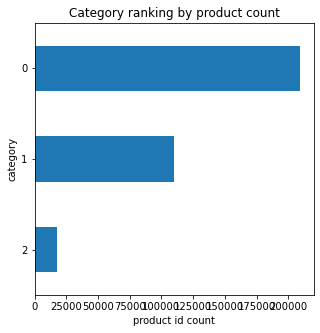

In [333]:
#category ranking by product. 
cvp.groupby('categ')\
    .agg({'id_prod': 'count'})\
    .sort_values('id_prod')\
    .plot(kind='barh', figsize=(5,5), legend=False);
plt.title('Category ranking by product count')
plt.ylabel('category');
plt.xlabel('product id count');

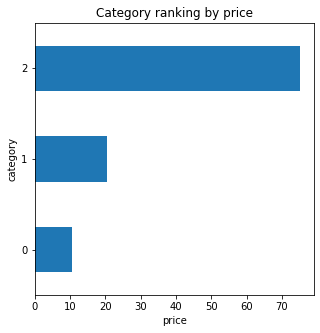

In [332]:
# Product category ranking by price. On the average the price of 
#category 2 are more expensive, followed by categ 1
cvp.groupby('categ')\
    .agg({'price': 'mean'})\
    .sort_values('price')\
    .plot(kind='barh', figsize=(5,5), legend=False);
plt.title('Category ranking by price')
plt.ylabel('category');
plt.xlabel('price');

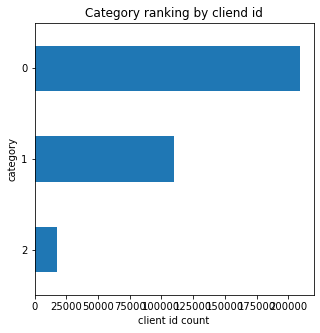

In [331]:
# Product category ranking by client_id. On the average the price of 
#category 2 are more expensive, followed by categ 1
cvp.groupby('categ')\
    .agg({'client_id': 'count'})\
    .sort_values('client_id')\
    .plot(kind='barh', figsize=(5,5), legend=False);
plt.title('Category ranking by cliend id')
plt.ylabel('category');
plt.xlabel('client id count');
#Most products sold and bought by customers falls 
#under the category 0, followed by category 1 and 2. This is because
#of the price distribution. The price for category 0 goods are less expensive,
#the price of category 1 good are a bit expensive,
#while category 2 products are very expensive.

In [34]:
#The motive is to understand the 
#customers purchasing habits.
client_n = cvp['client_id'].nunique()
print('Unique customers: {}'.format(client_n))
produit_n = cvp['id_prod'].nunique()
print('Unique cities: {}'.format(produit_n))

Unique customers: 8600
Unique cities: 3264


In [35]:
#what products category did customers purchased most?
#The product category bought most is category 1
# product disctribution
cvp['id_prod'].value_counts().sort_values(ascending=False)

1_369     1081
1_417     1062
1_498     1036
1_414     1027
1_425     1013
          ... 
0_1544       1
2_77         1
2_130        1
2_81         1
0_1633       1
Name: id_prod, Length: 3264, dtype: int64

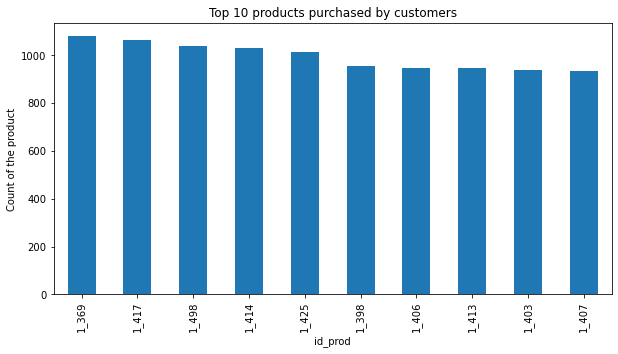

In [334]:
(
    cvp['id_prod']
    .value_counts()
    .sort_values(ascending=False)
    .head(10)
    .plot(kind='bar', figsize=(10, 5))
)

plt.title('Top 10 products purchased by customers')
plt.ylabel('Count of the product')
plt.xlabel('id_prod');
#The customers bought 3264 different products, 
#and the product having id_prod as the product which the customers bought most.

In [209]:
cvp[cvp["id_prod"] == "1_369"]#confirmation of the product category that appear most. 

,id_prod,price,categ,date,session_id,client_id,birth,hour,year,month,age,month_year,sex_m
97,1_369,23.99,1,2021-05-19 16:58:26.914361,s_36713,c_7954,1973,16,2021,5,48,2021-05,1
358,1_369,23.99,1,2021-08-04 16:47:08.530748,s_71344,c_1455,1932,16,2021,8,89,2021-08,0
449,1_369,23.99,1,2021-09-14 11:56:23.841151,s_89764,c_2768,1989,11,2021,9,32,2021-09,0
555,1_369,23.99,1,2021-06-10 15:04:51.369005,s_46768,c_3921,1972,15,2021,6,49,2021-06,0
11236,1_369,23.99,1,2021-10-28 20:59:51.409240,s_111485,c_1609,1980,20,2021,10,41,2021-10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
334937,1_369,23.99,1,2022-02-14 06:37:49.530143,s_164912,c_2065,1991,6,2022,2,31,2022-02,1
335355,1_369,23.99,1,2021-04-24 19:53:03.925069,s_25229,c_3760,1970,19,2021,4,51,2021-04,1
336393,1_369,23.99,1,2021-11-04 10:43:05.096960,s_114614,c_6578,1992,10,2021,11,29,2021-11,1
336701,1_369,23.99,1,2022-02-27 08:59:50.979490,s_171605,c_3058,1959,8,2022,2,63,2022-02,1


In [37]:
# count of session_id
cvp['session_id'].nunique()

169173

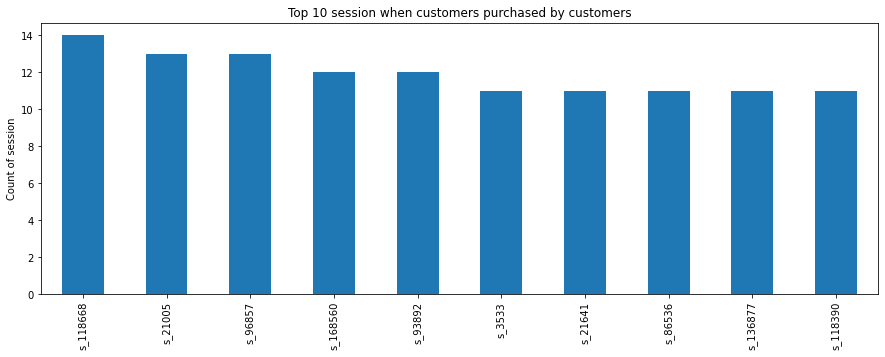

In [335]:
(
    cvp['session_id']
    .value_counts()
    .sort_values(ascending=False)
    .head(10)
    .plot(kind='bar', figsize=(15, 5))
)

plt.title('Top 10 session when customers purchased by customers')
plt.ylabel('Count of session');
#The most seesion customers bought their proudct are in the night. We confirmed this below using
#the hour attribute. 

In [39]:
cvp[cvp["session_id"] == "s_118668"]

,id_prod,price,categ,date,session_id,client_id,birth,hour,year,month,age,sex_m
274132,0_1089,3.99,0,2021-11-12 20:02:54.200624,s_118668,c_5995,1992,20,2021,11,29,0
274134,2_209,69.99,2,2021-11-12 20:00:00.956739,s_118668,c_5995,1992,20,2021,11,29,0
274135,0_1564,11.12,0,2021-11-12 20:09:17.901543,s_118668,c_5995,1992,20,2021,11,29,0
274138,1_396,18.60,1,2021-11-12 20:54:33.612303,s_118668,c_5995,1992,20,2021,11,29,0
274139,0_1400,5.15,0,2021-11-12 21:24:36.491177,s_118668,c_5995,1992,21,2021,11,29,0
274140,0_1334,17.74,0,2021-11-12 20:08:40.783542,s_118668,c_5995,1992,20,2021,11,29,0
274142,0_1430,16.47,0,2021-11-12 20:36:39.252082,s_118668,c_5995,1992,20,2021,11,29,0
274143,0_1108,17.45,0,2021-11-12 20:20:33.659396,s_118668,c_5995,1992,20,2021,11,29,0
274146,0_1488,4.60,0,2021-11-12 20:23:50.319430,s_118668,c_5995,1992,20,2021,11,29,0
274151,1_293,22.99,1,2021-11-12 21:23:52.304426,s_118668,c_5995,1992,21,2021,11,29,0


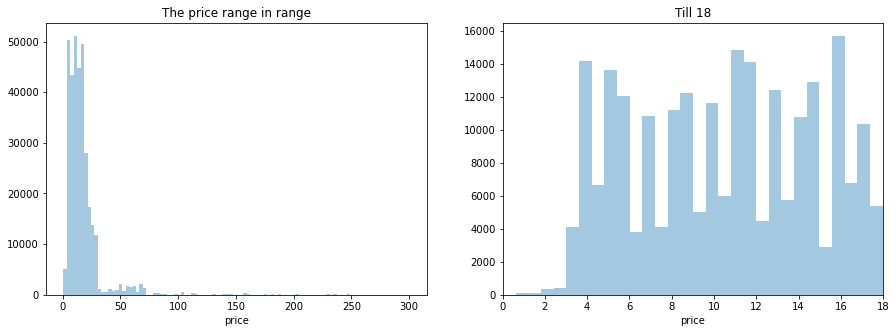

In [337]:
#visualization of our data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
ax1.set_title('The price range in range')
ax2.set_title('Till 18')

ax2.set_xlim([0, 18])

sns.distplot(cvp['price'],
            bins = 100,
            ax = ax1,
            axlabel = 'price',
            kde = False)
sns.distplot(cvp['price'],
            bins = 500,
            ax = ax2,
            axlabel = 'price',
            kde = False);

/Users/badewaaderogba/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

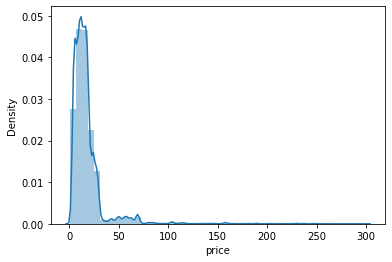

In [175]:
# As confirmed from the statistical distribution indicators above,
#the price is extremely skewed to the right
sns.distplot(cvp['price'])
#The distribution of price: The statistical mean for the item price is approximately 17, 
#which rely on a skewed distribution. 
#The majority of the prices is in the lower range of up to 20.

/Users/badewaaderogba/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

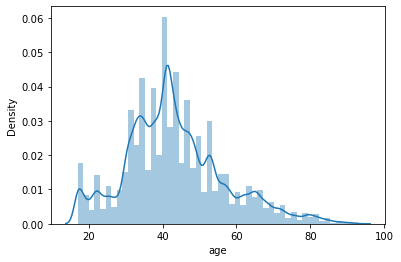

In [221]:
sns.distplot(cvp['age'])

In [218]:
#this function allows us to use any variable with numerical 
#value anytime to locate the extreme values
#boxplot
def plot_boxplot(df, ut):
    df.boxplot(column=[ut])
    plt.grid(False)
    plt.show()

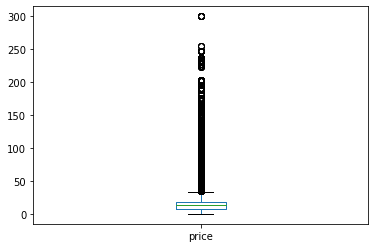

In [340]:
# This boxplot also affirm the presence of outliers as 
#revealed by the the statistical indicators.
#As we can see above the whisker are few extreme values
plot_boxplot(cvp, "price")#boxplot for price

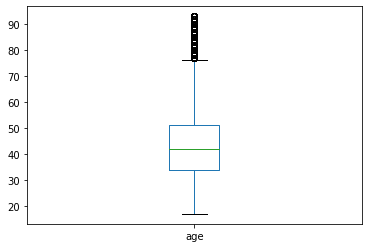

In [222]:
plot_boxplot(cvp, "age")#boxplot for age

In [223]:
#We can see that the product category 0 appears most, 
#followed by the category 1, and lastly the category 2
cvp['categ'].value_counts()

0    209426
1    109735
2     17552
Name: categ, dtype: int64

In [224]:
# Similar to the the explanation above, from proportion
#viewpoint, 62% of the product is 
#under category one, 33% approximately of the category 1, and 5% for the category 2.
#They are not equally distibuted
#this is confirmed in the graph below
pd.crosstab(cvp['categ'], columns= 'count', normalize=True)

col_0,count
categ,
0,0.621972
1,0.325901
2,0.052127


<AxesSubplot:xlabel='categ', ylabel='count'>

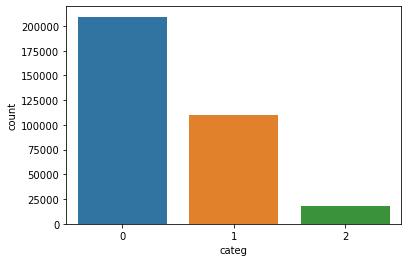

In [225]:
#category 0 is contributing the most, followed by category 1 and lastly category 2.
sns.countplot(x= 'categ', data=cvp)

In [226]:
#We can see that we have equal split between male=1 and female=0 sex. here we did value_counts
#of the different sex
cvp['sex_m'].value_counts()

1    169198
0    167515
Name: sex_m, dtype: int64

In [227]:
#From proportion viewpoint, the proportional are equal, that is close cut.
pd.crosstab(cvp['sex_m'], columns= 'count', normalize=True)

col_0,count
sex_m,
0,0.497501
1,0.502499


<AxesSubplot:xlabel='sex_m', ylabel='count'>

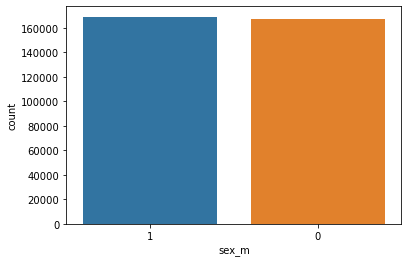

In [68]:
#Both sex category are closely cut. They are more or less equally distibuted
sns.countplot(x= 'sex_m', data=cvp)

In [228]:
#another way to confirm the distribution of price or age is to convert to categorical variable
cvp['age_category']= pd.cut(cvp['price'], [0, 30, 50, 100], labels =['adolescent', 'adult', 'senior'])

In [231]:
#We can see that the age category:young appears most, followed by the senior, and lastly the adolescent
cvp['age_category'].value_counts()

adolescent    314847
senior         12073
adult           6675
Name: age_category, dtype: int64

In [232]:
# Similar to the the explanation above, from proportion point viewpoint, 94% of the product is 
#being purchased by the younger ones, 4% approximately by the the senior, and 2% by the adolescent.
#They are not equally distibuted
#this is confirmed in the graph below
pd.crosstab(cvp['age_category'], columns= 'count', normalize=True)

col_0,count
age_category,
adolescent,0.943800
adult,0.020009
senior,0.036191


<AxesSubplot:xlabel='age_category', ylabel='count'>

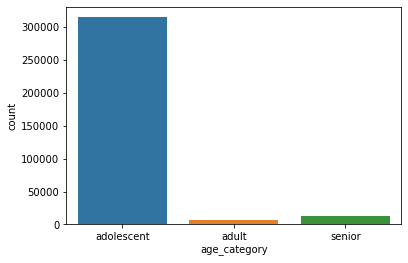

In [233]:
#their effect on price
#It is very clear that we have different price ranges for the categories.
#There is nothing fixed about each category
#Thus, category of product thus affect price, hence the variable categ seems very useful for modelling.
#it is very clear that their effect on price are not the same. The effect on price
#from the category 2 and 1 seems very exceptional. For all category, their median for price are not 
#the same. Category 0 product have more lower price. The category 2 has the highest price
#while category 2 are the most expensive product.
sns.countplot(x= 'age_category', data=cvp)

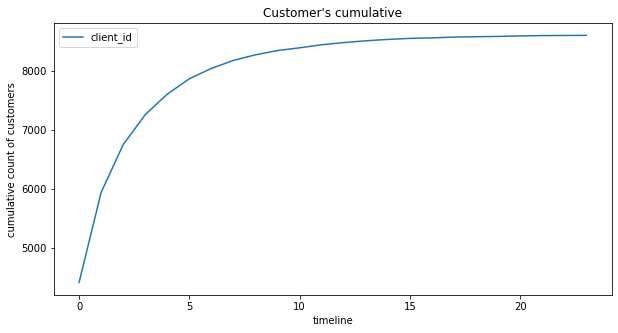

In [234]:
#mission 2:2 time series
cvphour.groupby('hour').count().cumsum().plot(figsize=(10,5))
plt.title('Customer\'s cumulative')
plt.xlabel('timeline')
plt.ylabel('cumulative count of customers');
#customers count increases with time

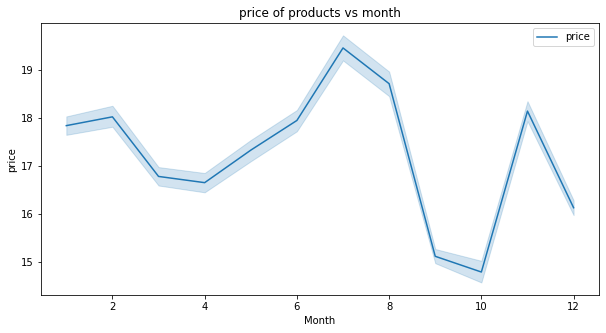

In [235]:
#mean:by month. We noticed that during the middle of the year the average price of good are very high
#In october, it fell and pick up again and further desscended from november till december.
fig, (ax1) = plt.subplots(1, 1, figsize = (10, 5))
ax1.set_title('price of products vs month')

sns.lineplot(
            data = cvp,
            x = 'month',
            y ='price',
            ax = ax1
            )


ax1.set(xlabel = 'Month', ylabel = 'price')
ax1.legend([
        
            'price'
            ]);

<AxesSubplot:xlabel='date'>

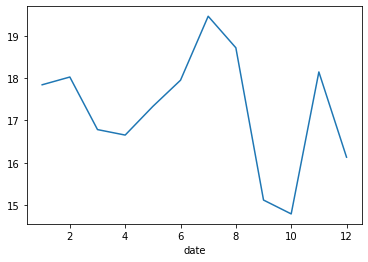

In [236]:
#mean:by month. We noticed that during the middle of the year the average price of good are very high
#In october, it fell and pick up again and further desscended from november till december.
cvp.groupby(cvp.date.dt.month).price.mean().plot()

<AxesSubplot:xlabel='date'>

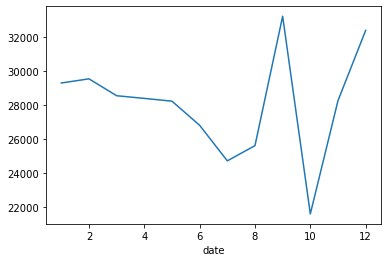

In [237]:
#count:by month
cvp.groupby(cvp.date.dt.month).price.count().plot()

<AxesSubplot:xlabel='date'>

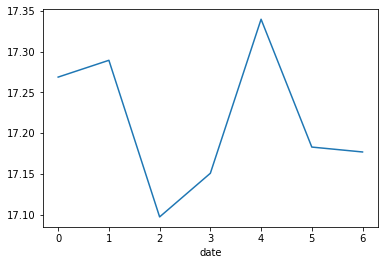

In [238]:
#mean:by days of the week
cvp.groupby(cvp.date.dt.dayofweek).price.mean().plot()

<AxesSubplot:xlabel='date'>

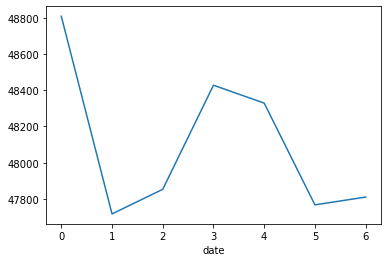

In [241]:
#count:by day of the week
cvp.groupby(cvp.date.dt.dayofweek).price.count().plot()

In [240]:
#The upper time series charts above show the monthly and the day of the week 
#average price and price counts over time. With respect to the monthly trend,
# during the middle of the year the average price of good reached the peak.
#In october, it fell and this is normal since it is a period of solde. 
#It picks up again and further descended from november till december. For the day of the 
#week trend, its normal that the price reached its peak on friday since it is the period people buy 
#most products for the weekend. The increase in price over time move in the
#same direction with time.

In [306]:
#Mission 2:2:Measure of concentration: gini, lorenz on product price
#aim to examine how evenly distributed, our data price across product category.
#to visualize if it is evenly distributed, or concentrated we use the lorenz curve
cvp_0 = cvp.loc[cvp['categ'] == '0']
cvp_0

,id_prod,price,categ,date,session_id,client_id,birth,hour,year,month,age,month_year,sex_m,age_category
0,0_1421,19.99,0,2021-05-12 23:26:29.885083,s_33709,c_7954,1973,23,2021,5,48,2021-05,1,adolescent
1,0_1142,3.42,0,2021-03-24 00:54:59.507581,s_10590,c_7954,1973,0,2021,3,48,2021-03,1,adolescent
2,0_1446,8.09,0,2021-11-26 18:04:33.019608,s_125461,c_7954,1973,18,2021,11,48,2021-11,1,adolescent
3,0_2291,12.99,0,2021-05-29 18:25:02.094891,s_41299,c_7954,1973,18,2021,5,48,2021-05,1,adolescent
6,0_2267,18.99,0,2021-12-08 08:08:21.229990,s_131181,c_7954,1973,8,2021,12,48,2021-12,1,adolescent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336696,0_1464,8.27,0,2021-10-07 12:32:18.961825,s_101312,c_4934,1994,12,2021,10,27,2021-10,1,adolescent
336698,0_1066,9.44,0,2021-08-03 11:46:26.883356,s_70843,c_674,1960,11,2021,8,61,2021-08,1,adolescent
336699,0_1856,9.57,0,2021-11-13 23:00:11.780612,s_119245,c_674,1960,23,2021,11,61,2021-11,1,adolescent
336707,0_1931,4.99,0,2022-01-06 01:45:15.759634,s_145605,c_1970,2002,1,2022,1,20,2022-01,1,adolescent


In [307]:
cvp_1 = cvp.loc[cvp['categ'] == '1']
cvp_1

,id_prod,price,categ,date,session_id,client_id,birth,hour,year,month,age,month_year,sex_m,age_category
4,1_385,25.99,1,2021-06-01 20:41:40.157683,s_42731,c_7954,1973,20,2021,6,48,2021-06,1,adolescent
5,1_129,18.99,1,2022-01-14 04:11:22.679688,s_149535,c_7954,1973,4,2022,1,49,2022-01,1,adolescent
7,1_250,20.76,1,2021-09-20 19:58:10.558163,s_92903,c_7954,1973,19,2021,9,48,2021-09,1,adolescent
10,1_446,23.92,1,2021-06-01 20:27:38.296127,s_42731,c_7954,1973,20,2021,6,48,2021-06,1,adolescent
11,1_257,22.99,1,2021-05-12 23:25:49.904138,s_33709,c_7954,1973,23,2021,5,48,2021-05,1,adolescent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336703,1_369,23.99,1,2021-06-07 10:00:02.971593,s_45288,c_1992,1956,10,2021,6,65,2021-06,0,adolescent
336704,1_383,28.99,1,2021-12-24 22:56:49.680517,s_139508,c_1992,1956,22,2021,12,65,2021-12,0,adolescent
336705,1_364,10.30,1,2021-04-08 04:09:57.291662,s_17555,c_855,1951,4,2021,4,70,2021-04,1,adolescent
336706,1_278,19.18,1,2021-05-22 22:44:44.719955,s_38163,c_1970,2002,22,2021,5,19,2021-05,1,adolescent


In [308]:
cvp_2 = cvp.loc[cvp['categ'] == '2']
cvp_2

,id_prod,price,categ,date,session_id,client_id,birth,hour,year,month,age,month_year,sex_m,age_category
522,2_1,56.99,2,2021-04-15 01:33:18.629293,s_20713,c_1508,1996,1,2021,4,25,2021-04,0,senior
1113,2_46,41.31,2,2021-07-24 17:01:27.026839,s_66626,c_1609,1980,17,2021,7,41,2021-07,1,adult
13792,2_172,158.17,2,2021-06-24 06:55:31.864573,s_53015,c_7889,1982,6,2021,6,39,2021-06,0,NaN
13841,2_46,41.31,2,2021-11-14 05:47:48.432634,s_119392,c_1437,2004,5,2021,11,17,2021-11,0,adult
13842,2_46,41.31,2,2021-07-14 12:02:31.031491,s_62168,c_1437,2004,12,2021,7,17,2021-07,0,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336695,2_110,62.25,2,2021-08-19 08:46:07.018249,s_77793,c_8005,1955,8,2021,8,66,2021-08,0,senior
336697,2_135,68.99,2,2021-09-03 17:28:42.572885,s_84588,c_4934,1994,17,2021,9,27,2021-09,1,senior
336709,2_181,57.99,2,2021-08-05 23:36:00.315963,s_71886,c_6837,1995,23,2021,8,26,2021-08,0,senior
336711,2_163,68.99,2,2022-01-28 16:51:07.389515,s_156517,c_7739,1997,16,2022,1,25,2022-01,1,senior


In [303]:
#Mission 2:2:Measure of concentration: gini, lorenz on product price
#aim to examine how evenly distributed, our data price accross transactions.
#to visualize if it is evenly distributed, or concentrated we use the lorenz curve
# create an array  price !
arr = cvp[['price']].to_numpy()
arr

array([[19.99],
       [ 3.42],
       [ 8.09],
       ...,
       [13.99],
       [68.99],
       [63.99]])

In [309]:
#Mission 2:2:Measure of concentration: gini, lorenz on product price
#aim to examine how evenly distributed, our data price accross transactions.
#to visualize if it is evenly distributed, or concentrated we use the lorenz curve
# create an array  price !
arr0 = cvp_0[['price']].to_numpy()
arr0

array([[19.99],
       [ 3.42],
       [ 8.09],
       ...,
       [ 9.57],
       [ 4.99],
       [19.85]])

In [310]:
#Mission 2:2:Measure of concentration: gini, lorenz on product price
#aim to examine how evenly distributed, our data price accross transactions.
#to visualize if it is evenly distributed, or concentrated we use the lorenz curve
# create an array  price !
arr1 = cvp_1[['price']].to_numpy()
arr1

array([[25.99],
       [18.99],
       [20.76],
       ...,
       [10.3 ],
       [19.18],
       [13.99]])

In [311]:
#Mission 2:2:Measure of concentration: gini, lorenz on product price
#aim to examine how evenly distributed, our data price accross transactions.
#to visualize if it is evenly distributed, or concentrated we use the lorenz curve
# create an array  price !
arr2 = cvp_2[['price']].to_numpy()
arr2

array([[ 56.99],
       [ 41.31],
       [158.17],
       ...,
       [ 57.99],
       [ 68.99],
       [ 63.99]])

In [350]:
#array for the whole data
def gini(arr):
    arr = arr.flatten()
    if np.amin(arr) < 0:
        arr -= np.amin(arr)
    arr += 0.0000001
    arr = np.sort(arr)
    index = np.arange(1, arr.shape[0]+1)
    n = arr.shape[0]
    return ((np.sum((2 * index - n - 1) * arr)) / (n * np.sum(arr)))

In [342]:
#array for category 0
def gini(arr0):
    arr0 = arr0.flatten()
    if np.amin(arr0) < 0:
        arr0 -= np.amin(arr0)
    arr0 += 0.0000001
    arr0 = np.sort(arr0)
    index = np.arange(1, arr0.shape[0]+1)
    n = arr0.shape[0]
    return ((np.sum((2 * index - n - 1) * arr0)) / (n * np.sum(arr0)))

In [343]:
#array for category 1
def gini(arr):
    arr1 = arr1.flatten()
    if np.amin(arr1) < 0:
        arr1 -= np.amin(arr1)
    arr1 += 0.0000001
    arr1 = np.sort(arr1)
    index = np.arange(1, arr1.shape[0]+1)
    n = arr1.shape[0]
    return ((np.sum((2 * index - n - 1) * arr1)) / (n * np.sum(arr1)))

In [344]:
#array for category 2
def gini(arr):
    arr2 = arr2.flatten()
    if np.amin(arr2) < 0:
        arr2 -= np.amin(arr2)
    arr2 += 0.0000001
    arr2 = np.sort(arr2)
    index = np.arange(1, arr2.shape[0]+1)
    n = arr2.shape[0]
    return ((np.sum((2 * index - n - 1) * arr2)) / (n * np.sum(arr2)))

In [345]:
#lorenz cureve for the whole data
def lorenz(arr):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

In [346]:
#lorenz curve for the categ0
def lorenz(arr0):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr0.cumsum() / arr0.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

In [347]:
#lorenz curve for the categ1
def lorenz(arr1):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr1.cumsum() / arr1.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

In [348]:
#lorenz curve for the categ2
def lorenz(arr2):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr2.cumsum() / arr2.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

In [351]:
# show the gini index for price in all
print(gini(arr))

0.3921455086138612


In [352]:
# show the gini index for price for categ0
print(gini(arr0))

0.2635668750735615


In [353]:
# show the gini index for price for categ1
print(gini(arr1))

0.1924394712191135


In [354]:
# show the gini index for price for categ2
print(gini(arr2))

0.23556103548229262


In [355]:
lorenz_curve = lorenz(arr)

In [356]:
lorenz_curve0 = lorenz(arr0)

In [357]:
lorenz_curve1 = lorenz(arr1)

In [358]:
lorenz_curve2 = lorenz(arr2)

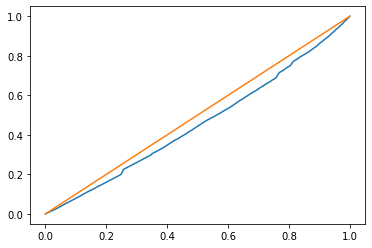

In [359]:
# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
# plot the straight line perfect equality curve
plt.plot([0,1], [0,1])
plt.show()

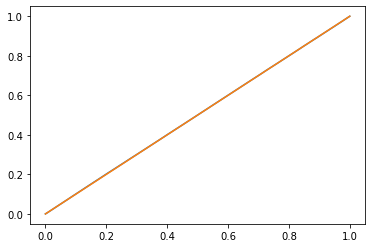

In [360]:
# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve0.size), lorenz_curve0)
# plot the straight line perfect equality curve
plt.plot([0,1], [0,1])
plt.show()

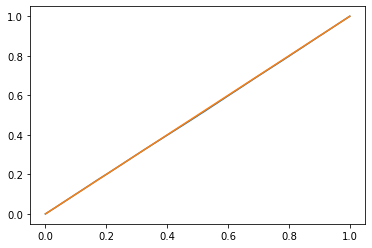

In [361]:
# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve1.size), lorenz_curve1)
# plot the straight line perfect equality curve
plt.plot([0,1], [0,1])
plt.show()

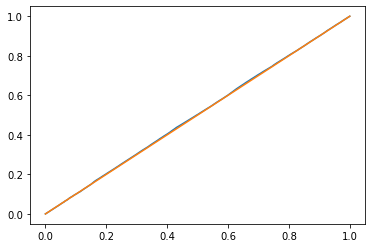

In [362]:
# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve2.size), lorenz_curve2)
# plot the straight line perfect equality curve
plt.plot([0,1], [0,1])
plt.show()

<AxesSubplot:title={'center':'price'}, xlabel='categ'>

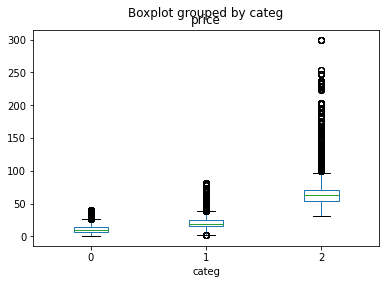

In [363]:
#bivariate analysis:plot target variable over multiple variables
#their effect on price
#It is very clear that we have different price ranges for the categories.
#There is nothing fixed about each category
#Thus, category of product thus affect price, hence the variable categ seems very useful for modelling.
#it is very clear that their effect on price are not the same. The effect on price
#from the category 2 and 1 seems very exceptional. For all category, their median for price are not 
#the same. Category 0 product have more lower price. The category 2 has the highest price
#while category 2 are the most expensive product. 
cvp.boxplot(by = 'categ', column=['price'], grid=False)

<AxesSubplot:title={'center':'price'}, xlabel='sex_m'>

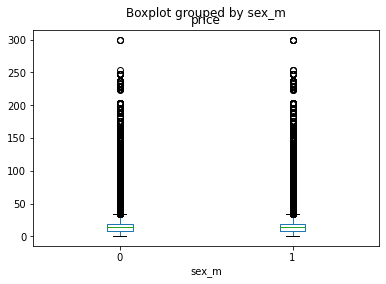

In [364]:
#their effect on price
#The effect are more or less the same as revealed by the boxplot.
#Thus, we have nothing much to say abot male or emale sex.
#they seems to have the same median for product's price.
#there is nothing we can infer from this whisker and box.
#for every product's price value, there is almost a 50-50 distribution. 
#as we can't conclude anything from this variable, we can treat it as insignificant
cvp.boxplot(by = 'sex_m', column=['price'], grid=False)

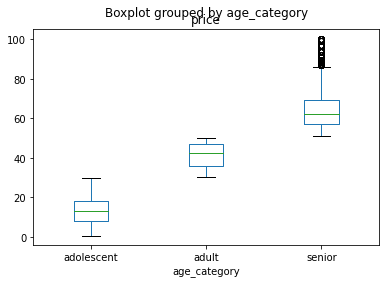

In [365]:
#their effect on price
#The effect are more or less the same as revealed by the boxplot.
#Thus, we have nothing much to say abot male or emale sex.
#they seems to have the same median for product's price.
#there is nothing we can infer from this whisker and box.
#for every product's price value, there is almost a 50-50 distribution. 
#as we can't conclude anything from this variable, we can treat it as insignificant
cvp.boxplot(by = 'age_category', column=['price'], grid=False)
plt.savefig('agecategbp.png')

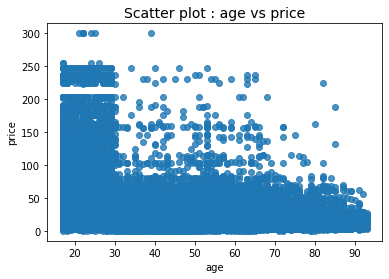

In [366]:
#age and price: we can see that the points are bounded up together 
sns.regplot(x='age', y='price', scatter=True,
           fit_reg=False, data = cvp)
plt.title("Scatter plot : age vs price", size=14)
plt.savefig('splotap.png')

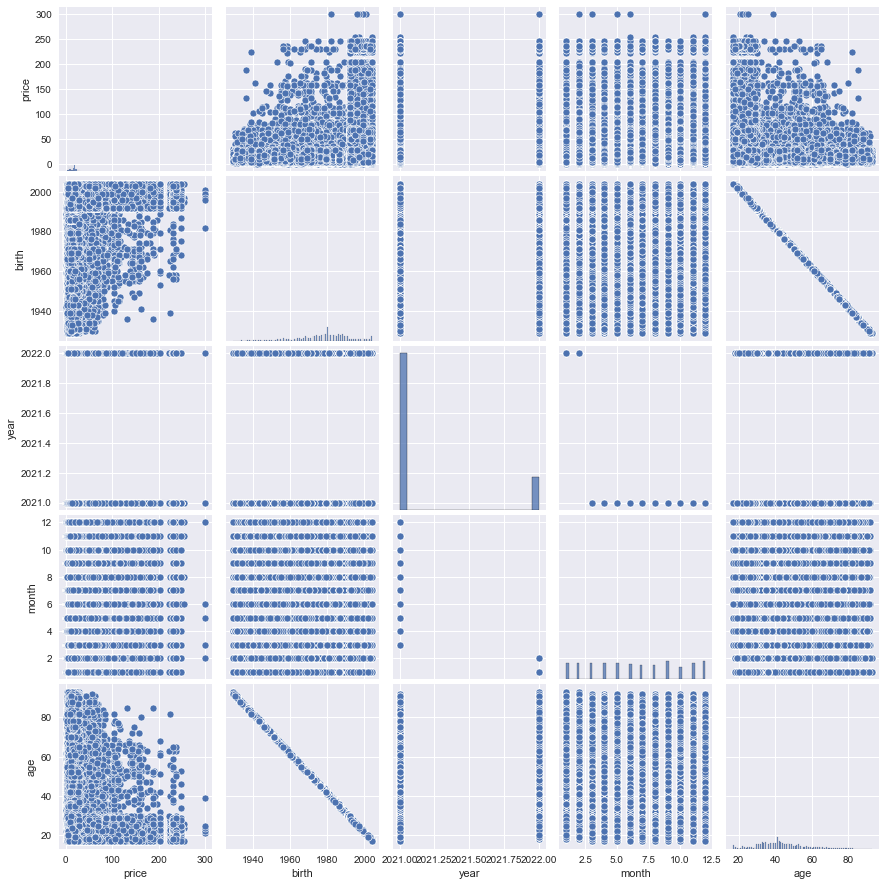

In [821]:
#Mission3:1: nonparametric correlation analysis
sns.pairplot(cvp)
plt.savefig('pairplot.png');

In [367]:
#Mission 3.1-nonparametric correlation analysis
#we use the crosstab() function to create a contigency table of
#the two selected variables to analyze sex and category
#we apply the chi@ contigency() function on the table and get the statistics,
#p value and degree of freedom(dof). The  result show that 81.86 is the pvalue, and 1.21 is the
#statistical value, and 3 is the dof. As  pvalue is greater than 0.05,
#we accept the NULL hypothesis and assume that categ and sex are independent of each other.
cat_col = ['sex_m', 'categ']
print(cat_col)
chisqt = pd.crosstab(cvp.sex_m, cvp.categ, margins=True)
print(chisqt)
value = np.array([chisqt.iloc[0][0:5].values,
                 chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

['sex_m', 'categ']
categ       0       1      2     All
sex_m                               
0      103786   55469   8260  167515
1      105640   54266   9292  169198
All    209426  109735  17552  336713
(81.86933350990711, 1.219022118530719e-17, 3)


In [115]:
#3.2. segmentation
#min date
cvp['date'].min()

Timestamp('2021-03-01 00:01:07.843138')

In [116]:
#max date
cvp['date'].max()

Timestamp('2022-02-28 23:59:58.040472')

In [377]:
#grouping by customer ID
#we have 8600 customer records grouped by recency:the number of days since the last purchase,
#frequency:number of transaction made over a given period, and monetary values: the amount spend over a 
#given period of time
#create snapshot date
snapshotD=cvp['date'].max() + timedelta(days=1)
print(snapshotD)
#grouping
cvp_grp = cvp.groupby(['client_id', 'month']).agg({'date': lambda x: 
(snapshotD - x.max()).days, 'id_prod': 'count', 'price': 'sum', 'age' :'mean'})
#renaming
cvp_grp .rename(columns={'date': 'recency', 'id_prod' : 'freq', 'price': 'Moneyv'}, inplace=True)
cvp_grp 

2022-03-01 23:59:58.040472


recency  freq  Moneyv  age
client_id month                            
c_1       2           28     1    5.99   67
          6          263     1   19.53   66
          7          217     4   55.22   66
          8          190     1   13.96   66
          9          174     2   19.98   66
...                  ...   ...     ...  ...
c_999     8          185     3   49.87   57
          9          163     5   49.98   57
          10         150     2   19.97   57
          11         100     5   82.29   57
          12          74     1    4.99   57

[68034 rows x 4 columns]

In [379]:
cvp[cvp["client_id"] == "c_1"]

,id_prod,price,categ,date,session_id,client_id,birth,hour,year,month,age,month_year,sex_m,age_category
314645,0_513,11.99,0,2021-07-21 22:41:38.769525,s_65433,c_1,1955,22,2021,7,66,2021-07,1,adolescent
314646,0_1571,5.99,0,2022-02-01 01:47:04.355850,s_158128,c_1,1955,1,2022,2,67,2022-02,1,adolescent
314647,0_1470,19.53,0,2021-06-11 21:02:39.382765,s_47346,c_1,1955,21,2021,6,66,2021-06,1,adolescent
314648,0_2277,10.99,0,2021-09-06 18:34:16.975976,s_85977,c_1,1955,18,2021,9,66,2021-09,1,adolescent
314649,0_1880,14.91,0,2021-11-04 18:37:01.482109,s_114737,c_1,1955,18,2021,11,66,2021-11,1,adolescent
314650,1_425,16.99,1,2021-12-25 03:53:43.623598,s_139610,c_1,1955,3,2021,12,66,2021-12,1,adolescent
314651,0_1378,13.96,0,2021-08-23 16:56:15.401655,s_79696,c_1,1955,16,2021,8,66,2021-08,1,adolescent
314652,0_1186,12.30,0,2021-07-25 12:17:34.446678,s_66947,c_1,1955,12,2021,7,66,2021-07,1,adolescent
314653,0_1090,13.78,0,2021-12-19 02:44:12.827475,s_136532,c_1,1955,2,2021,12,66,2021-12,1,adolescent
314654,0_1448,18.94,0,2021-07-26 17:37:29.438136,s_67467,c_1,1955,17,2021,7,66,2021-07,1,adolescent


In [380]:
#age arithmetic operation
cvp_grp["panier_moyen"] =cvp_grp["Moneyv"].div(cvp_grp["freq"].values)
cvp_grp

recency  freq  Moneyv  age  panier_moyen
client_id month                                          
c_1       2           28     1    5.99   67      5.990000
          6          263     1   19.53   66     19.530000
          7          217     4   55.22   66     13.805000
          8          190     1   13.96   66     13.960000
          9          174     2   19.98   66      9.990000
...                  ...   ...     ...  ...           ...
c_999     8          185     3   49.87   57     16.623333
          9          163     5   49.98   57      9.996000
          10         150     2   19.97   57      9.985000
          11         100     5   82.29   57     16.458000
          12          74     1    4.99   57      4.990000

[68034 rows x 5 columns]

In [383]:
modified1=cvp_grp.reset_index(level= 'month')
modified1

,month,recency,freq,Moneyv,age,panier_moyen
client_id,,,,,,
c_1,2,28,1,5.99,67,5.990000
c_1,6,263,1,19.53,66,19.530000
c_1,7,217,4,55.22,66,13.805000
c_1,8,190,1,13.96,66,13.960000
c_1,9,174,2,19.98,66,9.990000
...,...,...,...,...,...,...
c_999,8,185,3,49.87,57,16.623333
c_999,9,163,5,49.98,57,9.996000
c_999,10,150,2,19.97,57,9.985000


In [384]:
modified2=modified1.reset_index(level= 'client_id')
modified2

,client_id,month,recency,freq,Moneyv,age,panier_moyen
0,c_1,2,28,1,5.99,67,5.990000
1,c_1,6,263,1,19.53,66,19.530000
2,c_1,7,217,4,55.22,66,13.805000
3,c_1,8,190,1,13.96,66,13.960000
4,c_1,9,174,2,19.98,66,9.990000
...,...,...,...,...,...,...,...
68029,c_999,8,185,3,49.87,57,16.623333
68030,c_999,9,163,5,49.98,57,9.996000
68031,c_999,10,150,2,19.97,57,9.985000
68032,c_999,11,100,5,82.29,57,16.458000


In [386]:
#the same customers who bought different products at the same session: that is hour, different day and month.
cvp[cvp["session_id"] == "s_70595"]

,id_prod,price,categ,date,session_id,client_id,birth,hour,year,month,age,month_year,sex_m,age_category
45834,0_1455,8.99,0,2021-08-02 23:36:04.749127,s_70595,c_1367,1984,23,2021,8,37,2021-08,0,adolescent
45888,0_202,0.62,0,2021-08-02 23:27:31.721723,s_70595,c_1367,1984,23,2021,8,37,2021-08,0,adolescent


/Users/badewaaderogba/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


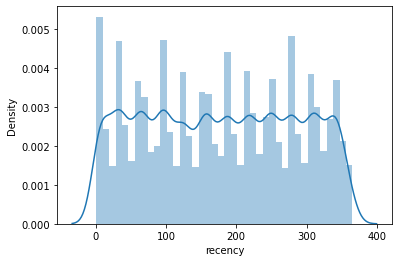

/Users/badewaaderogba/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


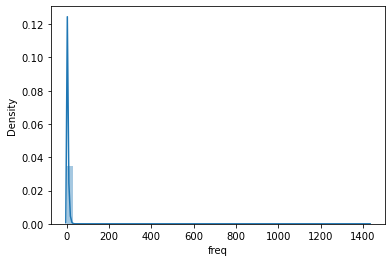

/Users/badewaaderogba/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


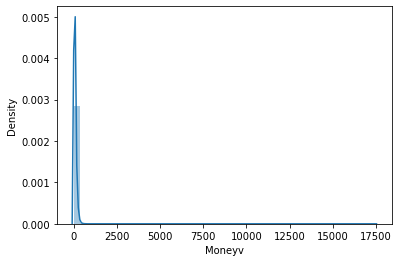

In [387]:
#plot of the distributions of recency, age, Frequency, totalmoney
#The distribution offers us seemingly interesting insights and how skewed our grouped data is.
#Recency
recency1 = cvp_grp['recency']
sns.distplot(recency1)
plt.savefig('recency.png');
plt.show()
#This chart makes sense because we see that there is the spike 
#at round about 270 days before the reference day. That falls in the time period of the heavy 
#Black Friday sales event where a lot of customers placed their latest order.
#Frequency
#We have seen this chart before. There are many customers which only 
#placed one order. As hinted in the initial "Olist Business Trend Analysis", 
#the error which many will likely get trapped is by simply applying count of 
#order_id during grouping by customer_unique_id. Reason why this leads to a wrong result:
#Quantity in the original order table is created by number of rows 
#(order quantity = 4 means 4 rows of data)
#Two SKUs (products) means two separate rows in the data table
#=> If we group by user "X" whose order contains procuct "A" with quantity 2 
#and procuct "B" with quantity 1, we will get 3 as count for this customer while in 
#reality only one single order was placed.
frequency = cvp_grp['freq']
sns.distplot(frequency)
plt.savefig('freq.png');
plt.show()
#Totalmoney
mv = cvp_grp['Moneyv']
sns.distplot(mv)
plt.savefig('moneyv.png');
plt.show()

In [388]:
# statistical correlation for all
cvp_grp.corr().loc[:,'age'].abs().sort_values(ascending=False)[1:]

panier_moyen    0.372934
Moneyv          0.072778
recency         0.025513
freq            0.015105
Name: age, dtype: float64

In [389]:
#correlation:age and montant- no really any dependency of amount on age. no 
#influence or dependency on age
from scipy import stats
stats.pearsonr(cvp_grp['age'], cvp_grp['Moneyv'])

(-0.07277760966014246, 1.4732043527459273e-80)

In [390]:
#age and freq: no correlation
from scipy import stats
stats.pearsonr(cvp_grp['age'], cvp_grp['freq'])

(-0.015105176221097767, 8.145273194195189e-05)

In [391]:
#age and average basket: there is correlation with age which is negative 
#and not very very strong
from scipy import stats
stats.pearsonr(cvp_grp['age'], cvp_grp['panier_moyen'])

(-0.37293387282680424, 0.0)

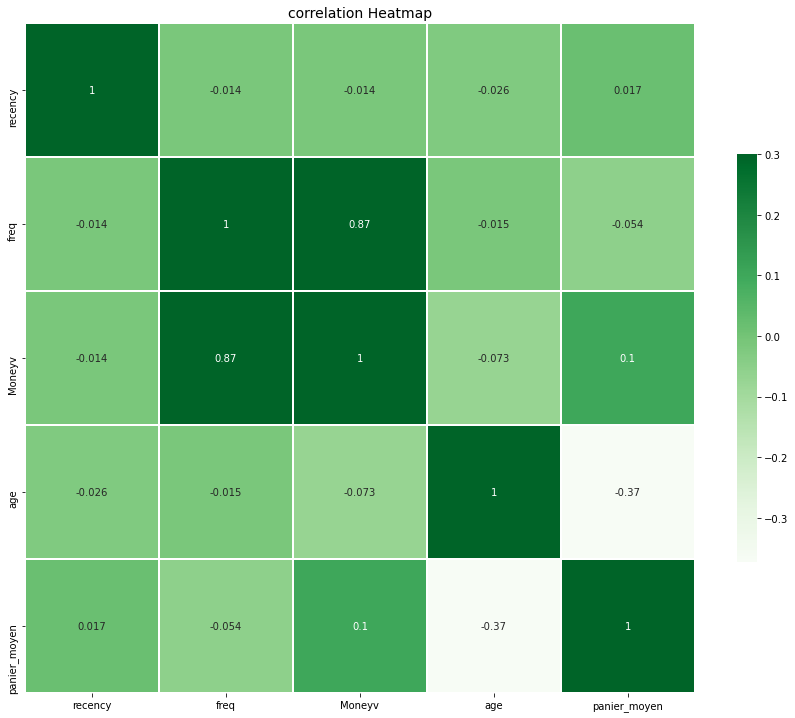

In [392]:
#visualization of the correlation statistics above
fig = plt.figure(figsize = (15, 15))
sns.heatmap(cvp_grp.corr(method = 'pearson'), annot = True, cmap = "Greens",vmax = 0.3, center=0,
           square = True, linewidths = 0.5, cbar_kws = {"shrink": 0.5})
plt.title("correlation Heatmap", size=14)
plt.savefig('corr.png');

In [410]:
#correlation of age and category
#Step 1
#grouping by customer ID
#create snapshot date
snapshotD=cvp['date'].max() + timedelta(days=1)
print(snapshotD)
#grouping
cvp_grp2 = cvp.groupby(['client_id', 'categ', 'month']).agg({'date': lambda x: 
(snapshotD - x.max()).days, 'id_prod': 'count', 'price': 'sum', 'age' :'mean'})
#renaming
cvp_grp2 .rename(columns={'date': 'recency', 'id_prod' : 'Frequency', 'price': 'Moneytaryvalue'}, inplace=True)
cvp_grp2

2022-03-01 23:59:58.040472


recency  Frequency  Moneytaryvalue  age
client_id categ month                                         
c_1       0     2           28          1            5.99   67
                6          263          1           19.53   66
                7          217          4           55.22   66
                8          190          1           13.96   66
                9          174          2           19.98   66
...                        ...        ...             ...  ...
c_999     1     1           36          3           53.92   58
                7          233          1           19.50   57
                8          190          2           44.98   57
                9          171          1           15.99   57
                11         100          4           77.96   57

[108467 rows x 4 columns]

In [411]:
#step 2
#multi-index approach to reset our index and convert categ to a column
modified3=cvp_grp2.reset_index(level= 'client_id')

In [412]:
#step 2
#multi-index approach to reset our index and convert categ to a column
modified4=modified3.reset_index(level= 'categ')

In [413]:
#step 2
#multi-index approach to reset our index and convert categ to a column
modified5=modified4.reset_index(level= 'month')

In [414]:
modified5

,month,categ,client_id,recency,Frequency,Moneytaryvalue,age
0,2,0,c_1,28,1,5.99,67
1,6,0,c_1,263,1,19.53,66
2,7,0,c_1,217,4,55.22,66
3,8,0,c_1,190,1,13.96,66
4,9,0,c_1,174,2,19.98,66
...,...,...,...,...,...,...,...
108462,1,1,c_999,36,3,53.92,58
108463,7,1,c_999,233,1,19.50,57
108464,8,1,c_999,190,2,44.98,57
108465,9,1,c_999,171,1,15.99,57


In [415]:
#the same customers who bought different products at the same session: that is hour, different day and month.
cvp[cvp["client_id"] == "c_1"]

,id_prod,price,categ,date,session_id,client_id,birth,hour,year,month,age,month_year,sex_m,age_category
314645,0_513,11.99,0,2021-07-21 22:41:38.769525,s_65433,c_1,1955,22,2021,7,66,2021-07,1,adolescent
314646,0_1571,5.99,0,2022-02-01 01:47:04.355850,s_158128,c_1,1955,1,2022,2,67,2022-02,1,adolescent
314647,0_1470,19.53,0,2021-06-11 21:02:39.382765,s_47346,c_1,1955,21,2021,6,66,2021-06,1,adolescent
314648,0_2277,10.99,0,2021-09-06 18:34:16.975976,s_85977,c_1,1955,18,2021,9,66,2021-09,1,adolescent
314649,0_1880,14.91,0,2021-11-04 18:37:01.482109,s_114737,c_1,1955,18,2021,11,66,2021-11,1,adolescent
314650,1_425,16.99,1,2021-12-25 03:53:43.623598,s_139610,c_1,1955,3,2021,12,66,2021-12,1,adolescent
314651,0_1378,13.96,0,2021-08-23 16:56:15.401655,s_79696,c_1,1955,16,2021,8,66,2021-08,1,adolescent
314652,0_1186,12.30,0,2021-07-25 12:17:34.446678,s_66947,c_1,1955,12,2021,7,66,2021-07,1,adolescent
314653,0_1090,13.78,0,2021-12-19 02:44:12.827475,s_136532,c_1,1955,2,2021,12,66,2021-12,1,adolescent
314654,0_1448,18.94,0,2021-07-26 17:37:29.438136,s_67467,c_1,1955,17,2021,7,66,2021-07,1,adolescent


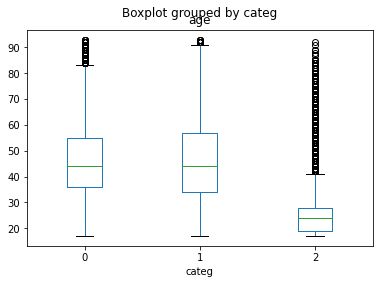

In [416]:
#step 3
modified5.boxplot(by = 'categ', column=['age'], grid=False)
plt.savefig('anova.png');

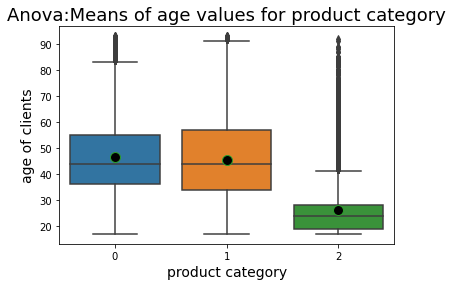

In [417]:
sns.boxplot(x="categ", y="age", data=modified5, showmeans=True, meanprops={"marker": "o",
                                                                         "markerfacecolor":"black",
                                                                         "markersize":"10"})
plt.ylabel("age of clients", size=14)
plt.xlabel("product category", size=14)
plt.title("Anova:Means of age values for product category", size=18)
plt.savefig("anovapic.png")

In [418]:
#find out the ages data for each category as a list
categgl=modified5.groupby('categ')['age'].apply(list)

In [419]:
#performing the anova test
anova_output = f_oneway(*categgl)
print('P-value for Anova is :', anova_output[1])
# we accept the assumption H0 only when p-value > 0.05
#H0 assumption is that categ and age are not correlated
#As the output of the pvalue is almost zero, we reject H0 which means the variables are correlated
# with each other. 

P-value for Anova is : 0.0


In [420]:
#conclusion and pratical suggestion
#our data is not ready for practical modelling. 
#All we did so far is just exploratory data analysis to understand our data.
#There are evidences of statistical 
#dispersion as revealed by the measures of central tendency, dispersion the gini, and lorenz curve.
#Hence, there is a need to normalize the data
#for practical decision making.
#There is no clear correlation between age and most other variables like frequency,
#money value and average baskets of good.
#we have anomalies related to upper limit related outliers 